# Wstęp do eksploracji danych w Pythonie

Ten notatnik pomoże Ci zapoznać się z postawowymi elementami eksploracji danych w Pythonie. Po uzupełnieniu tego notatnika powinieneś:

+ oswoić się z Jupyter Notebook,
+ znać nazwy podstawowych bibliotek do eksploracji i wizualizacji danych,
+ umieć wczytać zbiór danych,
+ wiedzieć jak wykonać podstawowe operacje na data frame'ie
+ umieć nauczyć i przetestować klasyfikator
+ wiedzieć jak wykonać prosty wykres

## Jupyter Notebook

Ten interaktywny plik, który właśnie czytasz to Jupyter Notebook. Żeby pisać bardziej po polsku, będziemy nazywać takie pliki *notatnikami*. 

Notatniki składanią się z bloków. Dwa podstawowe typy bloków to bloki Markdown i bloki kodu, o tym jakiego typu jest blok decyduje lista rozwijana w górnym menu. Bloki można uruchamiać pojedynczo, np. korzystając z ikonki >| w menu u góry lub wsadowo wybierając odpowiednią opcję z menu Kernel.

**Zad. 1: Spróbuj teraz uruchomić cały notatnik.**

Jak już mamy za sobą pierwszy sukces, spróbujmy uruchomić jakiś kod. Poniżej znajduje się pusty blok kodu.

**Zad. 2: Wpisz do bloku `print(u"I \u2764 Python")` i uruchom ten blok.**

In [1]:
print(u"I \u2764 Python")

I ❤ Python


Python to dla Ciebie nowość? Nie bój żaby, ten język jest całkiem prosty. Zajrzyj na stronę http://www.learnpython.org/, aby szybko opanować podstawy.

## Biblioteki

Oprócz podstawowych elementów języka, do eksploracji danych wykorzystamy klika bibliotek. Podstawowe biblioteki, które będą nam potrzebne to: `matplotlib`, `pandas`, `numpy` i `sklearn`. Część z potrzebnych modułów załadowałem już poniżej: 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, auc, roc_auc_score
import sklearn.metrics as skmt

**Zad. 3: Załaduj jeszcze dwie biblioteki: pandas z aliasem pd i numpy z aliasem np.**

In [3]:
import pandas as pd
import numpy as np

## Pandas

Najwyższy czas wczytać jakiś zbiór danych. W tym celu wykorzystamy bibliotekę, którą właśnie zaimportowałeś: pandas. Upewnij się, że ściagnięty zbiór danych znajduje się w tym samym folderze co notatnik i podążaj za komentarzami.

**Zad. 4: Wczytaj zbiór titanic do zmiennej `df`.**

In [11]:
# skorzystaj z metody read_csv w module pandas
# ponieważ nadalismy temu modułowi alias, musisz wywołać
# pd.read_csv()
# wyszukaj w Internecie jakie parametry przyjmuje ta funkcja
# wynik wywołania przypisz do zmiennej df

df = pd.read_csv('titanic.csv', sep=',')

Jeśli wszystko poszło dobrze, to zobaczmy jak wygląda pierwsze 10 wierszy zbioru (funkcję o takiej samej nazwie znasz z R).

**Zad. 5: Wyświetl pierwsze 10 wierszy zbioru.**

In [12]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Teraz zrobimy coś trochę trudniejszego - odfiltrujemy wybrane kolumny. Warto zajrzeć na http://pandas.pydata.org/pandas-docs/stable/10min.html, żeby zapoznać się z podstawowymi operacjami w pandas.

**Zad. 6: Usuń kolumny PassengerId, Name, Ticket, Cabin. Wynik przypisz do zmiennej `df_filtered`. Wyświetl pierwsze 10 wierszy, żeby upewnić się że operacja się udała.**

In [15]:
df_filtered = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
df_filtered.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Zanim będziemy mogli wykorzystać jakikolwiek algorytm uczenia maszynowego z scikit-learn, musimy zrobić dwie rzeczy:
- uzupełnić (lub usunąć) brakujące wartości
- zamienić wszystkie atrybuty na liczby

Ponieważ dopiero zaczynamy pracę z pandas, wyeliminujemy wartości brakujące w najprostszy mozliwy sposób - usuniemy wiersze z wartościami pustymi

**Zad. 7: Usuń wiersze z brakującymi wartościami i przypisz wynikowego data fame'a do `df_complete`. Wyświetl pierwsze 10 wierszy i sprawdź czy zniknął piąty przykład.**

In [16]:
df_complete = df_filtered.dropna()
df_complete.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


**Zad. 8: Zamień Sex i Embarked na kolumny liczbowe.**

In [22]:
# tu trochę pomogę...
# musimy zamienić (słowo klucz) wartości tekstowe na liczby
# zrób coś takiego dla kolumny Sex (zignoruj ostrzeżenie):
#
# df_complete.loc[:,"Sex"].replace({"female": 0, "male": 1}, inplace=True)
# df_complete.head(10)
#
# jeśli to się uda - wymyśl coś podobnego dla kolumny Embarked

df_complete.loc[:,"Sex"].replace({"female": 0, "male": 1}, inplace=True)
df_complete.loc[:"Embarked"].replace({"S": 0, "C": 1, "Q": 2}, inplace=True)
df_complete.head(10)

C:\Users\kowal\AppData\Local\Temp\ipykernel_11928\1162420716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete.loc[:,"Sex"].replace({"female": 0, "male": 1}, inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
6,0,1,1,54.0,0,0,51.8625,0
7,0,3,1,2.0,3,1,21.0750,0
8,1,3,0,27.0,0,2,11.1333,0
9,1,2,0,14.0,1,0,30.0708,1
10,1,3,0,4.0,1,1,16.7000,0


Pandas (i numpy na którym bazuje) potrafi dużo, dużo więcej, ale na tę chwilę to co zrobiliśmy nam wystarczy.

## Scikit-learn

Czas przejść do uczenia maszynowego. Korzystając z [dokumentacji scikit-learn](http://scikit-learn.org/stable/) oraz slajdów do zajęć, spróbuj wykonać kolejne zadania. Polecam też [tutoriale Kevina Markhama](http://blog.kaggle.com/author/kevin-markham/).

**Zad. 9: Korzystając z scikit-learn podziel `df_complete` na zbiór uczący i testowy, kolejno w proporcjach 60%-40%.**

In [24]:
# to nie jest takie trudne, bo już zaimportowaliśmy odpowiednią funkcję (spójrz na importy)
# doczytaj tylko co zwraca funkcja, której użyjesz - scikit ma trochę inne podejście do zbiorów danych niż np. caret
# postaraj się, aby ten losowy podział był powtarzalny...
# UWAGA: chcemy przewidywać wartość zmiennej Survived

X = df_complete.loc[:, df_complete.columns != "Survived"]
y = df_complete.loc[:, "Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

**Zad. 10: Korzystając ze zbioru treningowego zoptymalizuj parametry klasyfikatora RandomForestClassifier. Użyj oceny krzyżowej z miarą AUC.**


In [42]:
# spójrz na slajdy do zajęć, znajdujące się tam fragmenty kodu powinny Cię naprowadzić na rozwiązanie
# uważaj... będziesz musiał zaimportować dodatkową bibliotekę
# upewnij się też, że Twój eksperyment jest powtarzalny...

tuned_parameters = {'n_estimators': [10, 50, 100, 200, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8]}

clf = GridSearchCV(RandomForestClassifier(random_state=42), tuned_parameters, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)
print(clf.best_params_)

C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 50}


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(p

**Zad. 11: Oceń uzyskany model na zbiorze testowym.**

In [43]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       169
           1       0.81      0.65      0.72       116

    accuracy                           0.79       285
   macro avg       0.80      0.77      0.78       285
weighted avg       0.79      0.79      0.79       285


C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

Jeśli dotarłeś do tego momentu, to gratulacje 👏

## Seaborn

Żeby coś narysować w Pythonie najczęściej korzysta się z biblioteki matplotlib i jakichś nakładek na tę bibliotekę. Matplotlib jest biblioteką względnie niskopoziomową, która mogłaby zostać porównana do podstawowego mechanizmu rysowania w R (tzw. *base plotting system*). Za pomocą matplotliba da się narysować prawie wszystko, z nakładkami jest już gorzej i dlatego często miesza się wykorzystanie różnych bibliotek.

Spróbujmy coś narysować, żeby zakończyć raport obrazkiem. Wykorzystamy w tym celu bibliotekę [seaborn](http://seaborn.pydata.org/index.html). Jeśli nie masz jej zainstalowanej musisz otworzyć terminal Anacondy (*Anaconda Prompt*) i wpisać `conda install seaborn`.

In [44]:
# najpierw odrobina magii
# jeśli chcemy żeby wykresy rysowały nam się w raporcie to musimy wykonać instrukcję
%matplotlib inline

In [45]:
# dodatkowo zaimportujmy przydatne biblioteki i ustawmy domyślny styl wykresów
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

**Zad. 12: Skorzystaj z `violinplot` żeby porównać ceny biletów (Fare) dla różnych klas (Pclass). Jako palety kolorów użyj jednej z palet z [ColorBrewera](http://colorbrewer2.org/#type=qualitative&scheme=Set1&n=3)**

C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pclass', ylabel='Fare'>

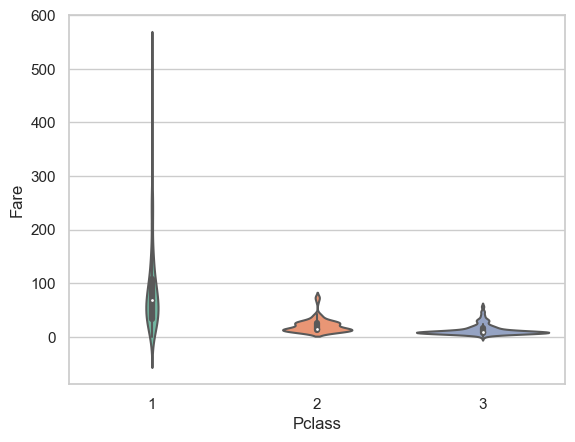

In [55]:
sns.violinplot(data=df_complete, x="Pclass", y="Fare", palette=sns.color_palette("Set2", n_colors=3))

## Plotnine

Sprawdź co pamiętasz z ggplota! Narysuj wykres przeżywalności mężczyzn i kobiet (`Sex`) z podziałem na typy biletów (`Pclass`)

C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\plotnine\utils.py:1183: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\plotnine\utils.py:289: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
C:\Users\kowal\anaconda3\envs\zed\Lib\site-packages\plotnine\utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\kowal\anaconda3\envs\zed\Lib\site-pac

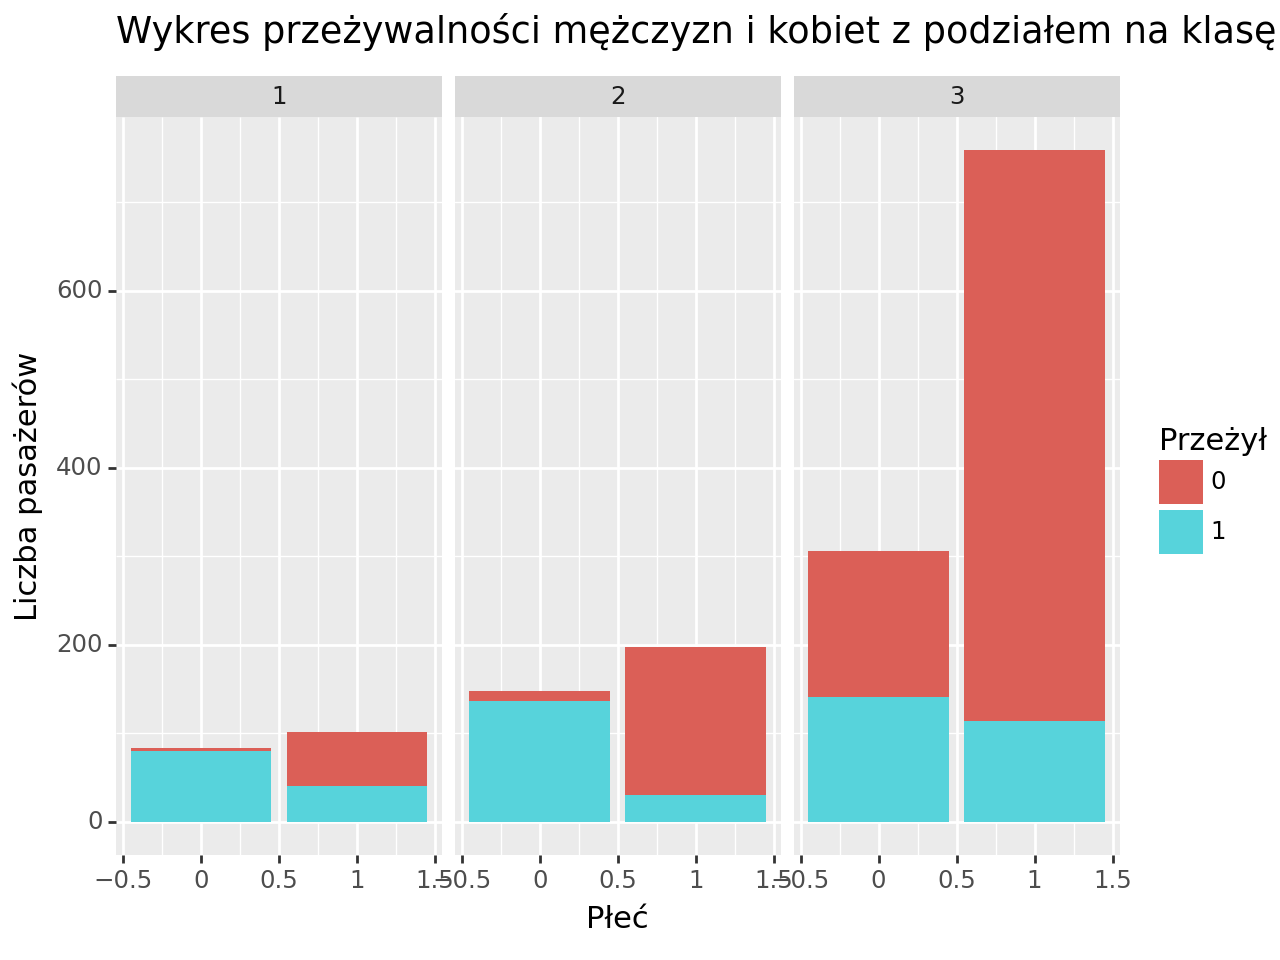

<Figure Size: (640 x 480)>

In [75]:
from plotnine import *

((ggplot(df_complete, aes(x="Sex", y='Pclass', fill='factor(Survived)')) + 
 geom_bar(stat="identity")) + 
 facet_wrap('~Pclass') + 
 labs(title = "Wykres przeżywalności mężczyzn i kobiet z podziałem na klasę biletu",
      x = "Płeć",
      y = "Liczba pasażerów",
      fill = "Przeżył"))